## Import Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import cv2

## Reading the Image

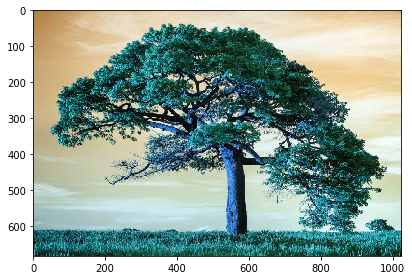

In [41]:
chico= cv2.imread(r'tree2.jpeg')
imshow(chico);

## Binarizing the Image

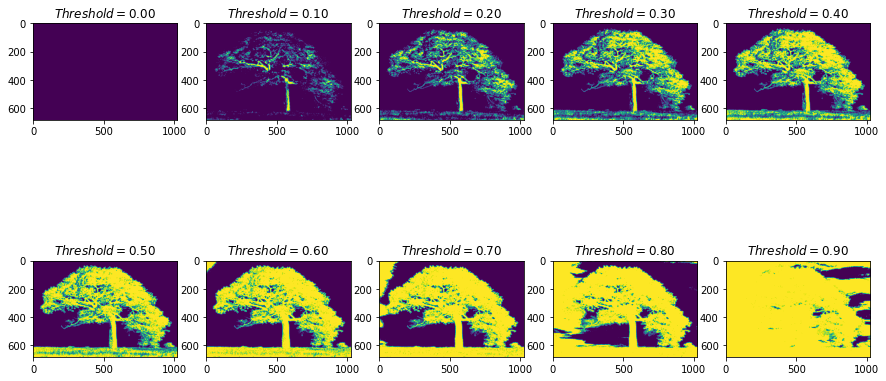

In [42]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico_gray = rgb2gray(chico)
for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

## Intensity Value Histogram

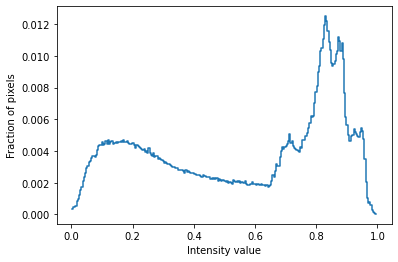

In [43]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

## Otsu's Thresholding Method

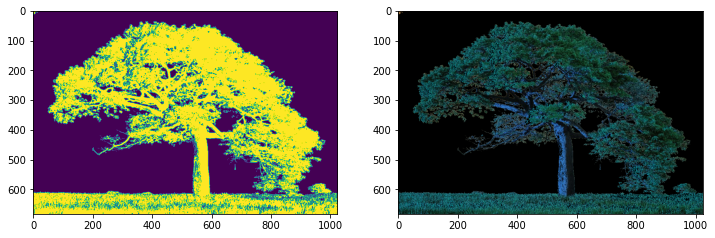

In [44]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = threshold_otsu(chico_gray)
chico_otsu  = chico_gray < thresh
ax[0].imshow(chico_otsu)
filtered = masked_image(chico, chico_otsu)
ax[1].imshow(filtered)

## Separating objects in foreground

### RGB Colorspace

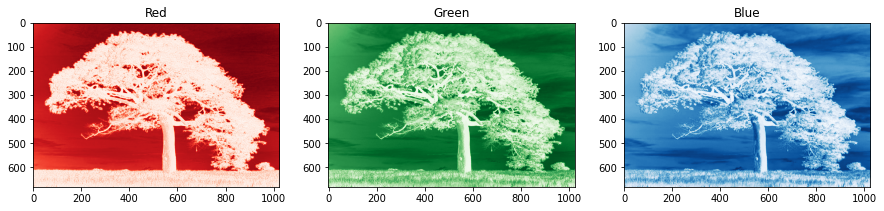

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

## Image segmentation Result

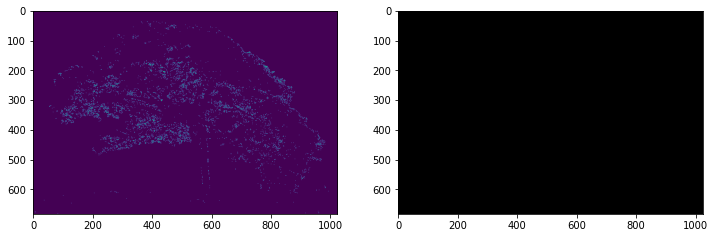

In [46]:
figure, ax = plt.subplots(1,2, figsize=(12,6))
chico_red = chico[:,:,0]
chico_green = chico[:,:,1]
chico_blue = chico[:,:,2]
binarized = ((chico_red < 200) & (chico_red > 75) & 
             (chico_green < 120) & (chico_green > 50) & 
             (chico_blue > 20))
opened = area_opening(binarized, 5000)
ax[0].imshow(binarized)
ax[1].imshow(masked_image(chico, opened))